# Logistic Regression

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

**Firstly we define the sigmoid function $\sigma$**
$$\sigma(x)=\frac{1}{1+e^{-x}}$$

In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

**We define hereunder our model $\hat{y}$ with parameters $\theta_0$ and $\theta_1$**
$$\hat{y}_{\theta}(x)=\sigma(\theta_0+\theta_1*x_1+\theta_2*x_2)$$

In [49]:
def y_hat(x, theta):
    return sigmoid(np.dot(x, theta)).ravel()

**Then we go for the loss function, in this example we use the BCE**
$$L(\theta, x, y) = -\frac{1}{N}\sum_{i=1}^{N}[y_ilog(\hat{y}_{\theta}(x_i))+(1-y_i)log(1-\hat{y}_{\theta}(x))]$$
$\theta = [\theta_0, \theta_1, \theta_2]$

In [50]:
def y_hat_to_label(y_pred, threshold):
    return (y_pred > threshold).astype(int)

In [51]:
def loss(y, y_pred):
    return 1/(len(y))*(-np.dot(y.T, np.log(y_pred)) - np.dot((1-y).T, np.log(1-y_pred)))

**As we will use a gradient descent algorithm we define a function to compute thoise gradients**
$$\frac{\partial L}{\partial \theta} = \frac{1}{N}\sum_{i=1}^{N}x_i(\hat{y}_{\theta}(x_i) - y_i)$$

In [52]:
def gradients(y, x, theta):
    return 1/(len(y)) * np.dot(x.T, (y_hat(x, theta) - y))

**Defining our metrics**

In [53]:
def confusion_matrix(pos_mask, neg_mask, y, y_pred):
    TP = sum(y[pos_mask] == y_pred[pos_mask])
    FN = sum(y[pos_mask] != y_pred[pos_mask])

    TN = sum(y[neg_mask] == y_pred[neg_mask])
    FP = sum(y[neg_mask] != y_pred[neg_mask])
    
    return TP, FN, TN, FP

def precision(TP, FP):
    return TP/(TP + FP)

def recall(TP, FN):
    return TP/(TP + FN)

def f1_score(precision, recall):
    return 2*(precision*recall)/(precision+recall)

**Finally we pack it up and create a train function**

In [54]:
def train(x, y, theta, learning_rate, condition_threshold):
    
    pos_mask = y == 1
    neg_mask = y == 0
    precision_history = list()
    recall_history = list()
    f1_history = list()
    
    loss_history = list()
    last_loss = np.inf
    
    condition = True
    step = 0
    threshold = .5
    
    while condition:
        y_pred = y_hat(x, theta)
        curr_loss = loss(y, y_pred)
        
        grad_theta = gradients(y, x, theta).reshape(theta.shape[0], 1)
        theta -= grad_theta * learning_rate 
        
        condition = np.abs(curr_loss - last_loss) > condition_threshold
        
        loss_history.append(curr_loss)
        
        if True:
        
            TP, FN, TN, FP = confusion_matrix(pos_mask, neg_mask, y, y_hat_to_label(y_pred, threshold))
            precision_history.append(precision(TP, FP))
            recall_history.append(recall(TP, FN))
            f1_history.append(f1_score(precision_history[-1], recall_history[-1]))

        last_loss = curr_loss
        
        step += 1
        if step % 30 == 0:
            pass
    
    _, ax = plt.subplots(2, 2, figsize=(20, 8))
    ax[0][0].plot(range(len(precision_history)), precision_history)
    ax[0][0].set_xlabel('step')
    ax[0][0].set_ylabel('Precision')
    ax[0][1].plot(range(len(recall_history)), recall_history)
    ax[0][1].set_xlabel('step')
    ax[0][1].set_ylabel('Recall')
    ax[1][0].plot(range(len(f1_history)), f1_history)
    ax[1][0].set_xlabel('step')
    ax[1][0].set_ylabel('F1')
    ax[1][1].plot(range(len(loss_history)), loss_history)
    ax[1][1].set_xlabel('step')
    ax[1][1].set_ylabel('Loss')
    plt.show()
    
    
    
    return np.array(loss_history)

**Create dataset**  
*We create a positive-semidefinite matrix randomly to have a new covariance each time. 
A random mean is generated also.*

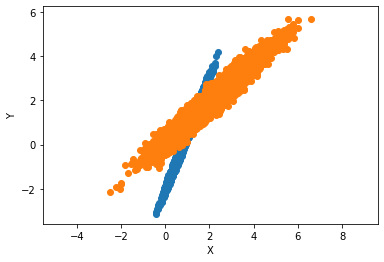

In [64]:
A = np.random.rand(2, 2)
B = np.random.rand(2, 2)
covA = np.dot(A, A.transpose())
covB = np.dot(B, B.transpose())
meanA = np.random.rand(2)
meanB = np.random.rand(2)+2

train_size = 10000

dsetA = np.random.multivariate_normal(mean=meanA, cov=covA, size=(train_size, 1)).reshape(train_size, 2)
dsetB = np.random.multivariate_normal(mean=meanB, cov=covB, size=(train_size, 1)).reshape(train_size, 2)
dsetA = np.hstack((dsetA, np.zeros((dsetA.shape[0], 1))))
dsetB = np.hstack((dsetB, np.ones((dsetA.shape[0], 1))))

xA, yA = dsetA[:, :2], dsetA[:, 2]
xB, yB = dsetB[:, :2], dsetB[:, 2]
plt.scatter(xA[:, 0], xA[:, 1])
plt.scatter(xB[:, 0], xB[:, 1])
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [65]:
dset = np.concatenate((dsetA, dsetB), axis=0)
np.random.shuffle(dset)
x, y = dset[:, :2], dset[:, 2]
x = np.hstack((np.ones((x.shape[0], 1)), x))

**Initialize weight**  
We initialize our weight $\theta$ with a gaussian prior

In [ ]:
theta = np.random.normal(size=(3, 1))
learning_rate = 1e-2

### TRAIN

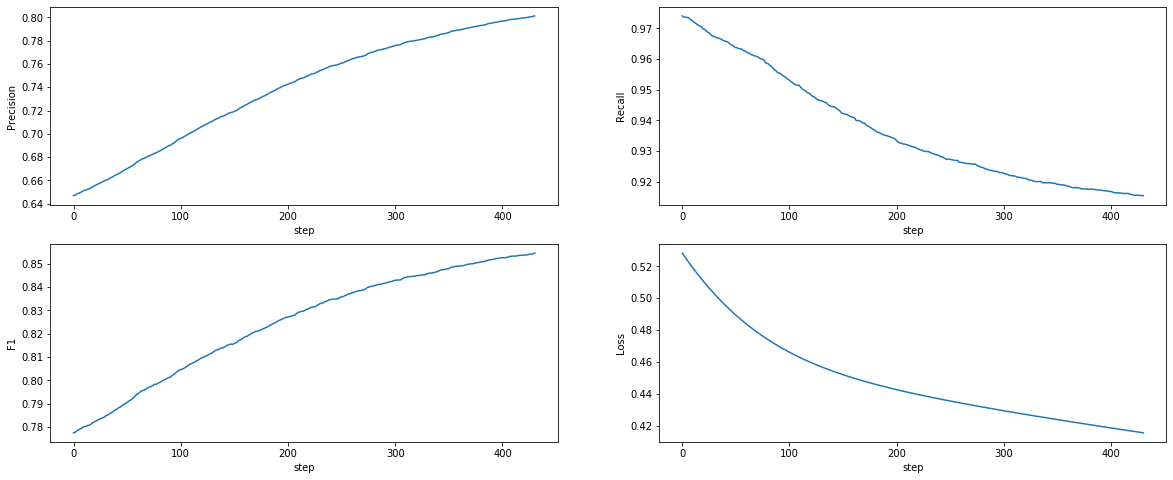

In [22]:
condition_threshold = 1e-4
loss_history = train(x, y, theta, learning_rate, condition_threshold)

### TEST

In [23]:
test_size = 50
dsetA_test = np.random.multivariate_normal(mean=meanA, cov=covA, size=(test_size, 1)).reshape(test_size, 2)
dsetB_test = np.random.multivariate_normal(mean=meanB, cov=covB, size=(test_size, 1)).reshape(test_size, 2)
dsetA_test = np.hstack((dsetA_test, np.zeros((dsetA_test.shape[0], 1))))
dsetB_test = np.hstack((dsetB_test, np.ones((dsetB_test.shape[0], 1))))

dset_test = np.concatenate((dsetA_test, dsetB_test), axis=0)
np.random.shuffle(dset_test)
x_test, y_test = dset_test[:, :2], dset_test[:, 2].astype(int)
x_test = np.hstack((np.ones((x_test.shape[0], 1)), x_test))

In [24]:
y_pred_test = y_hat(x_test, theta)
pos_mask = y_test == 1
neg_mask = y_test == 0

In [25]:
TP, FN, TN, FP = confusion_matrix(pos_mask, neg_mask, y_test, y_hat_to_label(y_pred_test, .5))
p = precision(TP, FP)
r = recall(TP, FN)
print(p)
print(r)
print(f1_score(p, r))

0.8333333333333334
0.9
0.8653846153846153


**ROC**

In [26]:
def ROC(y, y_pred, threshold, pos_mask, neg_mask):
    TP, FN, TN, FP = confusion_matrix(pos_mask, neg_mask, y, y_hat_to_label(y_pred, threshold))
    return TP/(TP+FN), FP/(FP+TN)

In [40]:
tprs = list()
fprs = list()
for threshold_ in np.arange(0.0, 1.0, .0001):
    tpr, fpr = ROC(y_test, y_pred_test, threshold_, pos_mask, neg_mask)
    tprs.append(tpr)
    fprs.append(fpr)

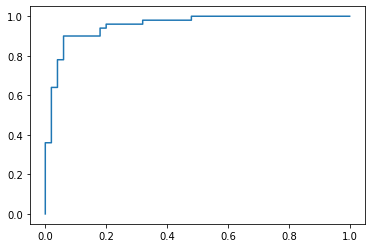

In [41]:
plt.plot(fprs, tprs)